In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

### Dataset Description

<img src="images/CDX_2009_Network_USMA-1.png">

* Snort Intrusion Detection Log/strong: from 0700-Nov-08 to 1600-Nov-11
* Domain Name Service Logs: from 0700-Nov-08 to 1600-Nov-11
    * External DNS named Service Log
    * External DNS Message Log
* Web Server Logs: 24-Hour Logs from 1600-Nov-10 to 1600-Nov-11
    * Apache Web Server Access Log
    * Apache Web Server Error Log

# Time-Series Analysis

Time series is a series of data points indexed in time order. The data is organized by relatively deterministic timestamps and contains additional information we can extract. The data points are indicators of some activity that takes place in a given period of time. The time is typically placed on the x-axis and the magnitude on the y-axis. An important things to keep in mind when dealing with the time series is the consistency of the interval of time. You can define this interval to whatever suits your needs and offers the most valuable insight. The time interval can range from millisecond, second, minute, hour, day, week, month, year, or even a decade or century.

Our data is currently in the form of error logs. We created a script to convert our logs into a csv file.

In [2]:
import os
import sys

df = pd.read_csv('data/IRAhandle_tweets.csv')
df.head()

external_author_id  author  \
0  906000000000000000  10_GOP   
1  906000000000000000  10_GOP   
2  906000000000000000  10_GOP   
3  906000000000000000  10_GOP   
4  906000000000000000  10_GOP   

                                             content   region language  \
0  "We have a sitting Democrat US Senator on tria...  Unknown  English   
1  Marshawn Lynch arrives to game in anti-Trump s...  Unknown  English   
2  Daughter of fallen Navy Sailor delivers powerf...  Unknown  English   
3  JUST IN: President Trump dedicates Presidents ...  Unknown  English   
4  19,000 RESPECTING our National Anthem! #StandF...  Unknown  English   

      publish_date   harvested_date  following  followers  updates  ...  \
0  10/1/2017 19:58  10/1/2017 19:59       1052       9636      253  ...   
1  10/1/2017 22:43  10/1/2017 22:43       1054       9637      254  ...   
2  10/1/2017 22:50  10/1/2017 22:51       1054       9637      255  ...   
3  10/1/2017 23:52  10/1/2017 23:52       1062       9642      256  ...   
4   10/1/2017 2:13   10/1/2017 2:13       1050       9645      246  ...   

  account_type retweet  account_category new_june_2018     alt_external_id  \
0        Right       0        RightTroll             0  905874659358453760   
1        Right       0        RightTroll             0  905874659358453760   
2        Right       1        RightTroll             0  905874659358453760   
3        Right       0        RightTroll             0  905874659358453760   
4        Right       1        RightTroll             0  905874659358453760   

             tweet_id                                        article_url  \
0  914580356430536707  http://twitter.com/905874659358453760/statuses...   
1  914621840496189440  http://twitter.com/905874659358453760/statuses...   
2  914623490375979008  http://twitter.com/905874659358453760/statuses...   
3  914639143690555392  http://twitter.com/905874659358453760/statuses...   
4  914312219952861184  http://twitter.com/905874659358453760/statuses...   

                                          tco1_step1 tco2_step1 tco3_step1  
0  https://twitter.com/10_gop/status/914580356430...        NaN        NaN  
1  https://twitter.com/damienwoody/status/9145685...        NaN        NaN  
2  https://twitter.com/10_gop/status/913231923715...        NaN        NaN  
3  https://twitter.com/10_gop/status/914639143690...        NaN        NaN  
4  https://twitter.com/realDonaldTrump/status/914...        NaN        NaN  

[5 rows x 21 columns]

Before we analyze our dataset lets clean it up my removing unnecessarily information.

In [3]:
df.drop(columns=['tco1_step1', 'tco2_step1', 'tco3_step1'])

external_author_id           author  \
0       906000000000000000           10_GOP   
1       906000000000000000           10_GOP   
2       906000000000000000           10_GOP   
3       906000000000000000           10_GOP   
4       906000000000000000           10_GOP   
...                    ...              ...   
243886          2497991305  AUSTINLOVESBEER   
243887          2497991305  AUSTINLOVESBEER   
243888          2497991305  AUSTINLOVESBEER   
243889          2497991305  AUSTINLOVESBEER   
243890          2497991305  AUSTINLOVESBEER   

                                                  content         region  \
0       "We have a sitting Democrat US Senator on tria...        Unknown   
1       Marshawn Lynch arrives to game in anti-Trump s...        Unknown   
2       Daughter of fallen Navy Sailor delivers powerf...        Unknown   
3       JUST IN: President Trump dedicates Presidents ...        Unknown   
4       19,000 RESPECTING our National Anthem! #StandF...        Unknown   
...                                                   ...            ...   
243886  BREAKING: Killer avalanche sweeps three skiers...  United States   
243887  Why men should support International Women’s D...  United States   
243888  How we can rebuild trust in a UK divided by in...  United States   
243889  John Humphrys accused of patronising Angela Ra...  United States   
243890  Fossilized poop found in 180-million-year-old ...  United States   

       language     publish_date   harvested_date  following  followers  \
0       English  10/1/2017 19:58  10/1/2017 19:59       1052       9636   
1       English  10/1/2017 22:43  10/1/2017 22:43       1054       9637   
2       English  10/1/2017 22:50  10/1/2017 22:51       1054       9637   
3       English  10/1/2017 23:52  10/1/2017 23:52       1062       9642   
4       English   10/1/2017 2:13   10/1/2017 2:13       1050       9645   
...         ...              ...              ...        ...        ...   
243886  English    3/8/2017 8:59    3/8/2017 8:59         41         34   
243887  English    3/8/2017 8:59    3/8/2017 9:00         41         34   
243888  English    3/8/2017 8:59    3/8/2017 8:59         41         34   
243889  English    3/8/2017 8:59    3/8/2017 8:59         41         34   
243890  English    3/8/2017 8:59    3/8/2017 8:59         41         34   

        updates post_type account_type  retweet account_category  \
0           253       NaN        Right        0       RightTroll   
1           254       NaN        Right        0       RightTroll   
2           255   RETWEET        Right        1       RightTroll   
3           256       NaN        Right        0       RightTroll   
4           246   RETWEET        Right        1       RightTroll   
...         ...       ...          ...      ...              ...   
243886      173   RETWEET        Right        1       RightTroll   
243887      175   RETWEET        Right        1       RightTroll   
243888      170   RETWEET        Right        1       RightTroll   
243889      171   RETWEET        Right        1       RightTroll   
243890      174   RETWEET        Right        1       RightTroll   

        new_june_2018     alt_external_id            tweet_id  \
0                   0  905874659358453760  914580356430536707   
1                   0  905874659358453760  914621840496189440   
2                   0  905874659358453760  914623490375979008   
3                   0  905874659358453760  914639143690555392   
4                   0  905874659358453760  914312219952861184   
...               ...                 ...                 ...   
243886              0          2497991305  839400198002503680   
243887              0          2497991305  839400290168135680   
243888              0          2497991305  839400090582179840   
243889              0          2497991305  839400131325648896   
243890              0          2497991305  839400253413437440   

                               

Before we analyze our dataset let set if our time columns are actually time-series objects.

In [4]:
df.dtypes

external_author_id     int64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following              int64
followers              int64
updates                int64
post_type             object
account_type          object
retweet                int64
account_category      object
new_june_2018          int64
alt_external_id        int64
tweet_id               int64
article_url           object
tco1_step1            object
tco2_step1            object
tco3_step1            object
dtype: object

We can see `publish_date`, and `harvested_date` all need to be converted to the `datetime` form

`datetime` is a module that supplies classes for manipulating dates and times in both simple and complex ways. `date` and `time` arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

Let's convert these columns to datetime format.

In [5]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

### Exercise 1

* Convert the `harvested_date` to the datetime column

In order to plot with pandas the time must be the index of the dataframe.

In [6]:
df = df.set_index('publish_date')

In [7]:
df.head()

external_author_id  author  \
publish_date                                      
2017-10-01 19:58:00  906000000000000000  10_GOP   
2017-10-01 22:43:00  906000000000000000  10_GOP   
2017-10-01 22:50:00  906000000000000000  10_GOP   
2017-10-01 23:52:00  906000000000000000  10_GOP   
2017-10-01 02:13:00  906000000000000000  10_GOP   

                                                               content  \
publish_date                                                             
2017-10-01 19:58:00  "We have a sitting Democrat US Senator on tria...   
2017-10-01 22:43:00  Marshawn Lynch arrives to game in anti-Trump s...   
2017-10-01 22:50:00  Daughter of fallen Navy Sailor delivers powerf...   
2017-10-01 23:52:00  JUST IN: President Trump dedicates Presidents ...   
2017-10-01 02:13:00  19,000 RESPECTING our National Anthem! #StandF...   

                      region language   harvested_date  following  followers  \
publish_date                                                                   
2017-10-01 19:58:00  Unknown  English  10/1/2017 19:59       1052       9636   
2017-10-01 22:43:00  Unknown  English  10/1/2017 22:43       1054       9637   
2017-10-01 22:50:00  Unknown  English  10/1/2017 22:51       1054       9637   
2017-10-01 23:52:00  Unknown  English  10/1/2017 23:52       1062       9642   
2017-10-01 02:13:00  Unknown  English   10/1/2017 2:13       1050       9645   

                     updates post_type account_type  retweet account_category  \
publish_date                                                                    
2017-10-01 19:58:00      253       NaN        Right        0       RightTroll   
2017-10-01 22:43:00      254       NaN        Right        0       RightTroll   
2017-10-01 22:50:00      255   RETWEET        Right        1       RightTroll   
2017-10-01 23:52:00      256       NaN        Right        0       RightTroll   
2017-10-01 02:13:00      246   RETWEET        Right        1       RightTroll   

                     new_june_2018     alt_external_id            tweet_id  \
publish_date                                                                 
2017-10-01 19:58:00              0  905874659358453760  914580356430536707   
2017-10-01 22:43:00              0  905874659358453760  914621840496189440   
2017-10-01 22:50:00              0  905874659358453760  914623490375979008   
2017-10-01 23:52:00              0  905874659358453760  914639143690555392   
2017-10-01 02:13:00              0  905874659358453760  914312219952861184   

                                                           article_url  \
publish_date                                                             
2017-10-01 19:58:00  http://twitter.com/905874659358453760/statuses...   
2017-10-01 22:43:00  http://twitter.com/905874659358453760/statuses...   
2017-10-01 22:50:00  http://twitter.com/905874659358453760/statuses...   
2017-10-01 23:52:00  http://twitter.com/905874659358453760/statuses...   
2017-10-01 02:13:00  http://twitter.com/905874659358453760/statuses...   

                                                            tco1_step1  \
publish_date                                                             
2017-10-01 19:58:00  https://twitter.com/10_gop/status/914580356430...   
2017-10-01 22:43:00  https://twitter.com/damienwoody/status/9145685...   
2017-10-01 22:50:00  https://twitter.com/10_gop/status/913231923715...   
2017-10-01 23:52:00  https://twitter.com/10_gop/status/914639143690...   
2017-10-01 02:13:00  https://twitter.com/realDonaldTrump/status/914...   

                    tco2_step1 tco3_step1  
publish_date                               
2017-10-01 19:58:00        NaN        NaN  
2017-10-01 22:43:00        NaN        NaN  
2017-10-01 22:50:00        NaN        NaN  
2017-10-01 23:52:00        NaN        NaN  
2017-10-01 02:13:00        NaN        NaN

Now, we can plot the number of tweets over time.

<AxesSubplot:xlabel='publish_date'>

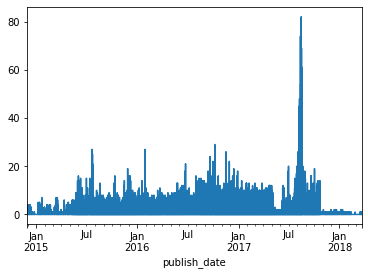

In [9]:
df['external_author_id'].resample('1S').count().plot()

The plot above demonstrates the number of events shown over time. Now it is your turn!

# Exercise 2

* Choose any one of the time-series columns
* Plot the number of events over time

We also look at the mean and standard deviation of the number of tweet published over time.

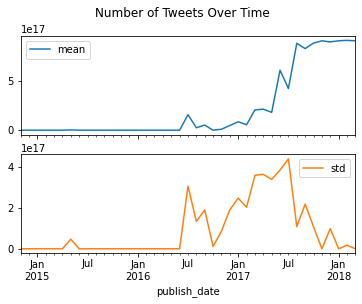

In [17]:
r = df['external_author_id'].resample('M').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

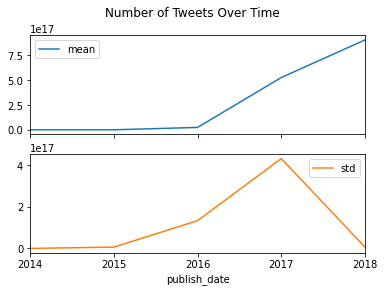

In [18]:
r = df['external_author_id'].resample('1Y').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

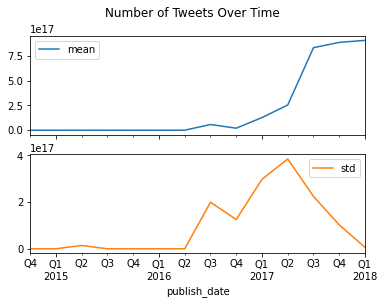

In [19]:
r = df['external_author_id'].resample('Q').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

Resample over a week, compute the mean and compare accross multiple values.

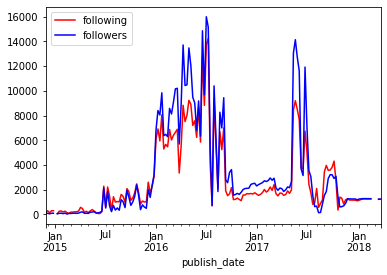

In [20]:
df['following'].resample('W').mean().plot(color='r', legend=True)
df['followers'].resample('W').mean().plot(color='b', legend=True)
plt.show()

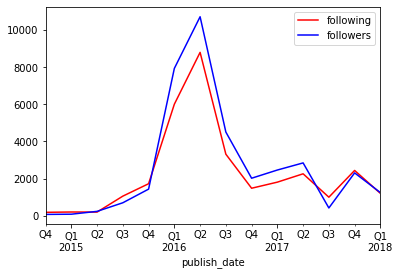

In [21]:
df['following'].resample('Q').mean().plot(color='r', legend=True)
df['followers'].resample('Q').mean().plot(color='b', legend=True)
plt.show()

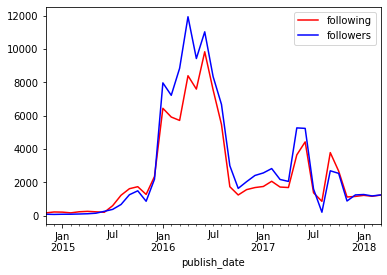

In [22]:
df['following'].resample('M').mean().plot(color='r', legend=True)
df['followers'].resample('M').mean().plot(color='b', legend=True)
plt.show()

Histogram plot of the mean different features resampled over month

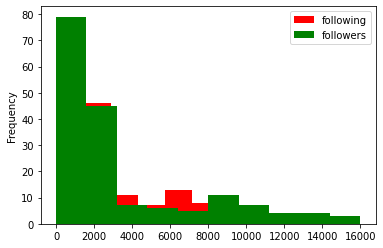

In [23]:
df['following'].resample('W').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('W').mean().plot(kind='hist', color='g', legend=True)
plt.show()

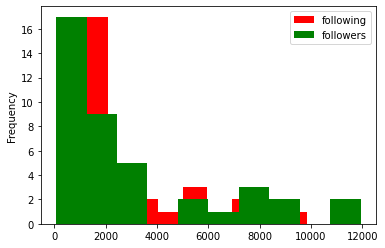

In [24]:
df['following'].resample('M').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('M').mean().plot(kind='hist', color='g', legend=True)
plt.show()

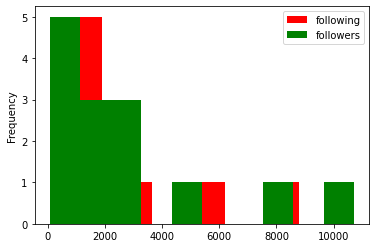

In [25]:
df['following'].resample('Q').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('Q').mean().plot(kind='hist', color='g', legend=True)
plt.show()